In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow import math

In [2]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [3]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

fraud_df_copy1 = fraud_df.copy()
fraud_df_copy2 = fraud_df.copy()
fraud_df_copy3 = fraud_df.copy()
fraud_df_copy4 = fraud_df.copy()

dfs = [fraud_df, fraud_df_copy1, fraud_df_copy2, fraud_df_copy3, fraud_df_copy4]

merge_df = pd.concat(dfs, ignore_index=True)

In [4]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=2460, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [5]:
new_df = merge_df.append(not_fraud_df, ignore_index=True)

In [6]:
X = np.array(new_df.iloc[:, np.r_[0:19, 28]])
y = np.array(new_df['Class'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [8]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Dense(units=60, activation='relu', input_dim=20))
model.add(Dense(units=2, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 3690 samples
Epoch 1/100
3690/3690 - 3s - loss: 0.5658 - accuracy: 0.7688
Epoch 2/100
3690/3690 - 1s - loss: 0.3637 - accuracy: 0.8894
Epoch 3/100
3690/3690 - 1s - loss: 0.2787 - accuracy: 0.9084
Epoch 4/100
3690/3690 - 1s - loss: 0.2414 - accuracy: 0.9133
Epoch 5/100
3690/3690 - 1s - loss: 0.2196 - accuracy: 0.9217
Epoch 6/100
3690/3690 - 1s - loss: 0.2078 - accuracy: 0.9228
Epoch 7/100
3690/3690 - 1s - loss: 0.1978 - accuracy: 0.9287
Epoch 8/100
3690/3690 - 1s - loss: 0.1916 - accuracy: 0.9301
Epoch 9/100
3690/3690 - 0s - loss: 0.1873 - accuracy: 0.9301
Epoch 10/100
3690/3690 - 0s - loss: 0.1873 - accuracy: 0.9285
Epoch 11/100
3690/3690 - 0s - loss: 0.1852 - accuracy: 0.9287
Epoch 12/100
3690/3690 - 0s - loss: 0.1796 - accuracy: 0.9309
Epoch 13/100
3690/3690 - 1s - loss: 0.1816 - accuracy: 0.9274
Epoch 14/100
3690/3690 - 0s - loss: 0.1764 - accuracy: 0.9290
Epoch 15/100
3690/3690 - 0s - loss: 0.1776 - accuracy: 0.9306
Epoch 16/100
3690/3690 - 1s - loss: 0.1754 - accuracy: 0.

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1230/1230 - 1s - loss: 0.1481 - accuracy: 0.9423
Loss: 0.14813647695128027, Accuracy: 0.9422764182090759


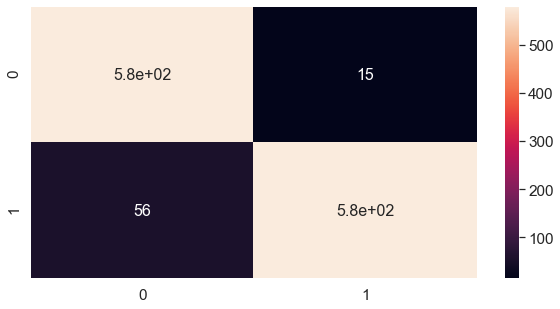

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_categorical.argmax(axis=1),model.predict(X_test_scaled).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(2),
                    range(2))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [16]:
cm

array([[579,  15],
       [ 56, 580]], dtype=int64)

In [17]:
model.save("updatedmodel.h5")